# Cloak Invisibility

## Hue Saturation Value [Real Definition] 

Hue Value
- H: Hue
Hue is the colour portion of the model, expressed as a number from 0 to 360 degrees:
Red falls between 0 and 60 degrees.
Yellow falls between 61 and 120 degrees.
Green falls between 121–180 degrees.
Cyan falls between 181–240 degrees.
Blue falls between 241–300 degrees.
Magenta falls between 301–360 degrees.

Saturation Value
- S: Saturation 
It describes the amount of grey in a particular colour, from 0 to 100 percent. Reducing this component toward zero introduces more grey and produces a faded effect. Sometimes, saturation appears as a range from just 0–1, where 0 is grey, and 1 is a primary colour.

Value (Brightness)
- V: Value 
It works in conjunction with saturation and describes the brightness or intensity of the colour, from 0–100 percent, where 0 is completely black, and 100 is the brightest and reveals the most colour.

## OPENCV Works in HSV Value [Very very Important]
- H values in HSV = [0-180] HUE from the above pic's x axis values
- S values in HSV = [0-255] Saturation from the above pic's y axis values
- V values in HSV = [0-255] Value usually 20-255. Need to do a bit hit and trial
    - Red is the only exceptional color for which we need to define two ranges and then combine them together.
    - For Green Blue and other colors we have to use only one masking upper and lower value.

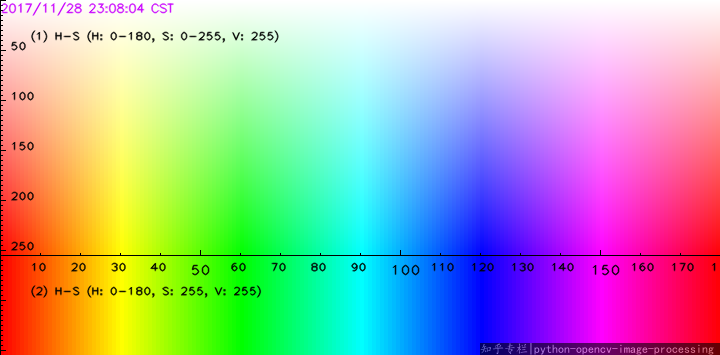

In [21]:
import cv2
import time
import numpy as np

## Preparation for writing the ouput video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (1280,720))

##reading from the webcam
cap = cv2.VideoCapture(0)

## Allow the system to sleep for 3 seconds before the webcam starts
time.sleep(3)
count = 0
background = 0

## Capture the background in range of 60
for i in range(60):
    ret, background = cap.read()
background = np.flip(background, axis=1)

## Read every frame from the webcam, until the camera is open
while (cap.isOpened()== True):
    ret, img = cap.read()
    count += 1
    img = np.flip(img, axis=1)

# H values in HSV = [0-180] HUE from the above pic's x axis values
# S values in HSV = [0-255] Saturation from the above pic's y axis values
# V values in HSV = [0-255] Value usually 20-255 Need to do a bit hit and trial

## Convert the color space from BGR to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
##------------------------------- For Red Color to disappear -------------------------------------##
# Red Range 1
    lower_red1 = np.array([0, 100, 20])
    upper_red1 = np.array([10, 255,255])
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

# Red range 2
    lower_red2 = np.array([160, 100,20])
    upper_red2 = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    mask1 = mask1 + mask2

##------------------------------- For Indian Brown Tone to disappear -------------------------------##
#     lower_bound = np.array([5, 0, 0])     
#     upper_bound = np.array([100, 255, 255])
#     mask1 = cv2.inRange(hsv, lower_bound, upper_bound)

##------------------------------- For Green Color to disappear -------------------------------------##
#     lower_bound = np.array([40, 100, 100])     
#     upper_bound = np.array([85, 255, 255])
#     mask1 = cv2.inRange(hsv, lower_bound, upper_bound)

##------------------------------- For Blue Color to disappear -------------------------------------##
#     lower_bound = np.array([90, 100, 100])     
#     upper_bound = np.array([130, 255, 255])
#     mask1 = cv2.inRange(hsv, lower_bound, upper_bound)

## Open and Dilate the mask image for reducing the noise blocks created by filling u those points
    mask1 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8),iterations = 2)
    mask1 = cv2.morphologyEx(mask1, cv2.MORPH_DILATE, np.ones((10, 10), np.uint8),iterations = 1)

## Create an inverted mask to segment out the color from the frame
    mask2 = cv2.bitwise_not(mask1)

## Segment the color part out of the frame using bitwise and operator
    res1 = cv2.bitwise_and(img, img, mask=mask2)

## Create image showing static background frame pixels only for the masked region
    res2 = cv2.bitwise_and(background, background, mask=mask1)

## Generating the final output and writing
    finalOutput = cv2.addWeighted(res1, 1, res2, 1, 0)
    out.write(finalOutput)
    cv2.imshow("magic", finalOutput)
    
    if cv2.waitKey(1) == ord('q'): ## Press q after clicking the window
        print("Successfully Completed the Masking Process..!!")
        break
    
cap.release()
cv2.destroyAllWindows()

Successfully Completed the Masking Process..!!


In [63]:
import cv2
import numpy as np
 
image = cv2.imread('red_rose.jpg')
cv2.imshow("Original", image)
 
result = image.copy()
 
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
# lower boundary RED color range values; Hue (0 - 10)
lower1 = np.array([0, 100, 20])
upper1 = np.array([10, 255, 255])
lower_mask = cv2.inRange(image, lower1, upper1)

# upper boundary RED color range values; Hue (160 - 180)
lower2 = np.array([160,100,20])
upper2 = np.array([180,255,255])
upper_mask = cv2.inRange(image, lower2, upper2)
 
full_mask = lower_mask + upper_mask
 
result = cv2.bitwise_and(result, result, mask=full_mask)
 
cv2.imshow('Masked Output', full_mask)
cv2.imwrite('Masked Output.png', full_mask)
cv2.imshow('Final Result', result)
cv2.imwrite('Final Result.png', result)
print('Succesfully Done..!!')
cv2.waitKey(0)
cv2.destroyAllWindows()

Succesfully Done..!!


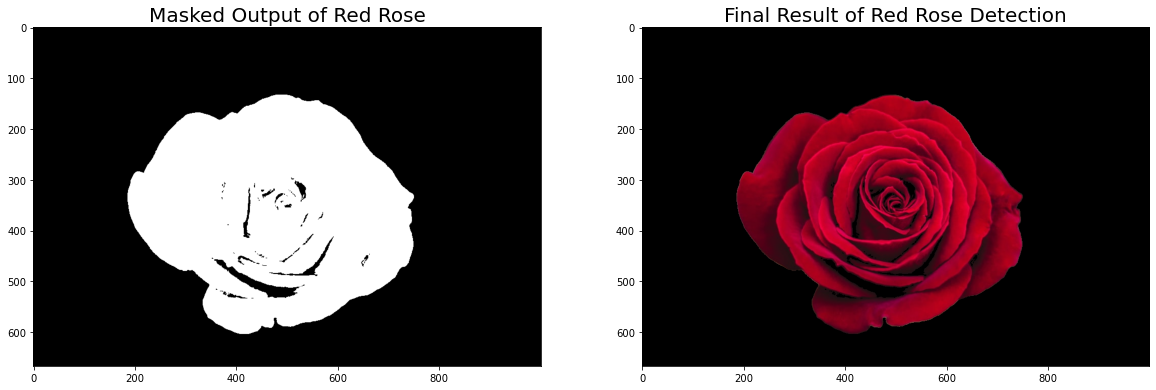

In [62]:
import matplotlib as mpl
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.subplot(1, 2, 1)
plt.title("Masked Output of Red Rose",fontdict={'fontsize':20})
plt.imshow(cv2.cvtColor(full_mask, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title("Final Result of Red Rose Detection",fontdict={'fontsize':20})
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()